In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree

#Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.shape

(303, 14)

In [5]:
#Name columns
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [6]:
#Conversion of data type
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

C:\Users\rions\AppData\Local\Temp\ipykernel_6632\4070612387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'][data['sex'] == 0] = 'female'
C:\Users\rions\AppData\Local\Temp\ipykernel_6632\4070612387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
C:\Users\rions\AppData\Local\Temp\ipykernel_6632\4070612387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [7]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [8]:
#Creation of labels, etc.
labels = data['target']
data = data.drop('target', axis = 1)

In [9]:
#Using Dummy variables to convert categorical to numeric
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,True,False,True,False,False,False,True,False,False,False,False,True,False
1,37,130,250,187,3.5,0,True,True,False,False,True,False,False,False,False,False,True,False,False
2,41,130,204,172,1.4,0,False,False,False,True,True,False,True,False,True,False,True,False,False
3,56,120,236,178,0.8,0,True,False,False,True,True,False,False,False,True,False,True,False,False
4,57,120,354,163,0.6,0,False,False,False,False,True,False,False,True,True,False,True,False,False


In [10]:
data.shape


(303, 19)

In [11]:
labels.shape


(303,)

In [12]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 56)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


In [13]:
#Run Model
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)
y_pred_quant = model.predict_proba(x_test)[:, 1] # Store predicted probabilites
y_pred = model.predict(x_test)


In [23]:
# Accuracy
training_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print("Training Accuracy :", training_accuracy)
print("Testing Accuracy (in percentage) :", test_accuracy * 100)

Training Accuracy : 0.9380165289256198
Testing Accuracy (in percentage) : 86.88524590163934


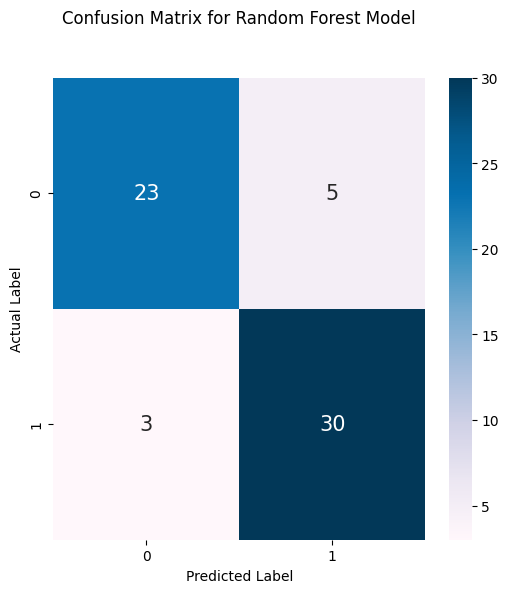

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot=True, annot_kws={'size': 15}, cmap='PuBu')
plt.title('Confusion Matrix for Random Forest Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

# Calculate Precision, Recall, Specificity, F1-score, MCC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the metrics
print("Precision :", precision)
print("Recall (Sensitivity) :", recall)
print("Specificity :", specificity)
print("F1-score :", f1)
print("MCC (Matthews Correlation Coefficient) :", mcc)


Precision : 0.8571428571428571
Recall (Sensitivity) : 0.9090909090909091
Specificity : 0.8571428571428571
F1-score : 0.8823529411764706
MCC (Matthews Correlation Coefficient) : 0.7361174128087679


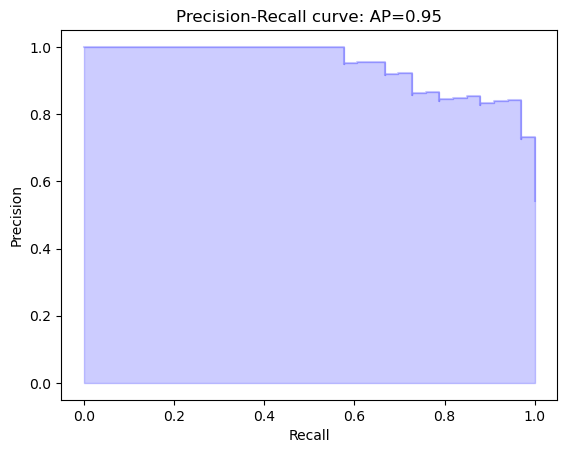

In [14]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision and Precision-Recall curve
average_precision = average_precision_score(y_test, y_pred_quant)
precision, recall, _ = precision_recall_curve(y_test, y_pred_quant)

# Plot Precision-Recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


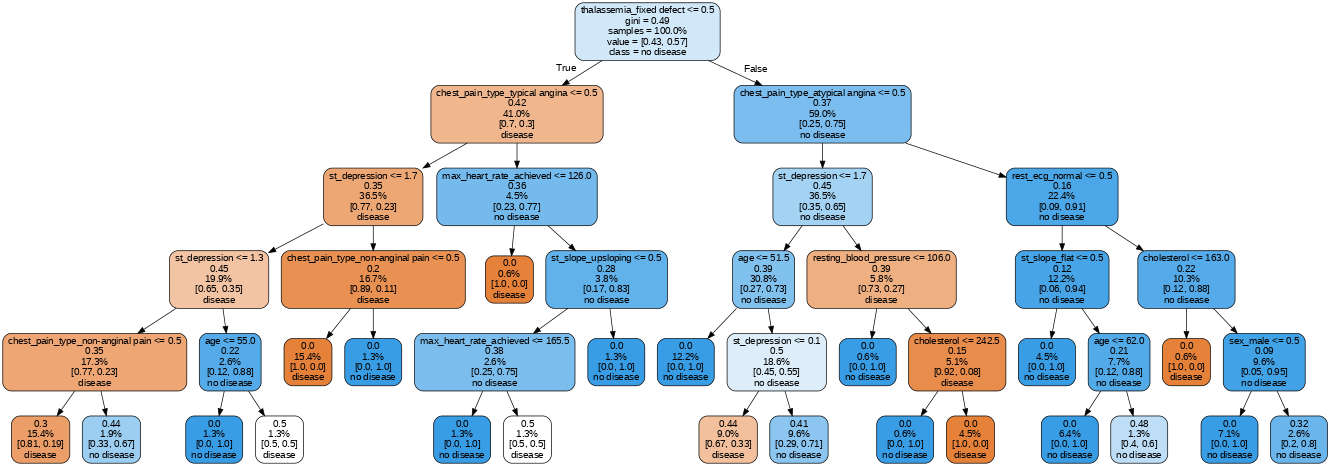

In [33]:
#Graph

estimator = model.estimators_[1]

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

In [34]:

#Sensitivity and Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8846153846153846
Specificity :  0.8571428571428571


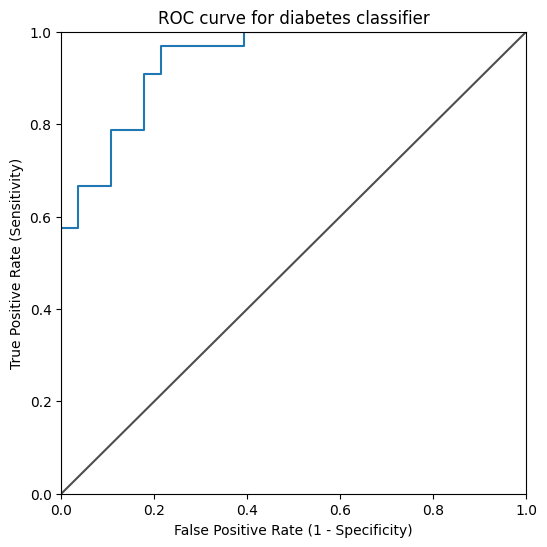

In [35]:
#Receiver Operating Characteristic Curve
falsepr, truepr, thresholds = roc_curve(y_test, y_pred_quant) #Create true and false positive rates

fig, ax = plt.subplots()
ax.plot(falsepr, truepr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [36]:
auc = auc(falsepr, truepr)
print("AUC Score :", auc)

AUC Score : 0.9372294372294373


In [ ]:
!pip install eli5

In [44]:
from eli5.sklearn import PermutationImportance
import eli5


In [45]:

#Weights/Importance of each feature
perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0525 ± 0.0525,thalassemia_fixed defect
0.0328 ± 0.0000,chest_pain_type_non-anginal pain
0.0295 ± 0.0382,resting_blood_pressure
0.0295 ± 0.0321,max_heart_rate_achieved
0.0262 ± 0.0334,st_slope_upsloping
0.0164 ± 0.0000,sex_male
0.0164 ± 0.0359,cholesterol
0.0164 ± 0.0293,st_depression
0.0164 ± 0.0464,num_major_vessels
0.0033 ± 0.0245,exercise_induced_angina_yes
